## Simulation Analysis

This notebook will go over analyzing simulated data gathered from 2-Simulation-Generation.

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.synth import *

from ratios import *
from settings import *

## Analyze results from Amplitude-varied simulations

In [2]:
# Load data
amp_dat = np.load("../dat/AMP_DEMO.npy")

In [3]:
amp_syns = []

for val in amp_dat[2]:
    amp_syns.append(val.gaussian_params[0][1])

In [4]:
# Calculate band ratios
amp_ratios = []

for amp in amp_dat[1]:
    amp_ratios.append(calc_band_ratio(amp_dat[0], amp, THETA_BAND, BETA_BAND))

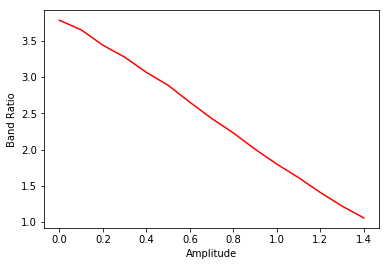

In [5]:
# Create DataFrame
amp_cols = np.array([amp_ratios, amp_syns]).T.tolist()

df_amp = pd.DataFrame(amp_cols, columns=["Band Ratio", "Amplitude"])

plt.xlabel("Amplitude")
plt.ylabel("Band Ratio")

# Fill in axes
plt.plot(df_amp.Amplitude, df_amp["Band Ratio"], color='r')

Recall that we varied the amplitude of the higher band. Here we see that as amplitude increases, the band ratio value decreases. This is consistent with expectation since band ratios are calculated as (power of low band)/ (power of high band). As the denominator increases, which is reflected by increasing the amplitude of the higher band, band ratios decrease.

## Aperiodic component and amplitude varied analysis

In this section we will see how varying the aperiodic component and amplitude affects band ratios. We will use heat-maps to visualize how the aforementioned parameters affect band ratios.

In [6]:
# Load Data
apc_amp_dat = np.load("../dat/APC_AMP_DEMO.npy")

In [7]:
data = []

for param in apc_amp_dat:
    inner_list = []
    freqs = param[1]

    for psd in param[2]:
        curr_ratio = calc_band_ratio(freqs, psd, THETA_BAND, BETA_BAND)
        inner_list.append(curr_ratio)
    data.append(inner_list)

The following cells will set up a list of aperiodic conponents and amplitudes to be used to make a table of corresponding ratio values

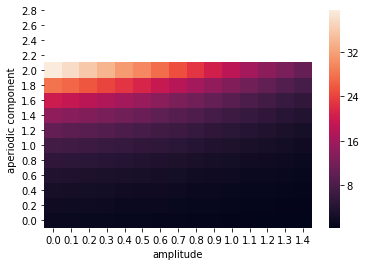

In [8]:
ax = sb.heatmap(data, xticklabels=AMPS, yticklabels=APCS)

ax.invert_yaxis()
plt.xlabel("amplitude")
plt.ylabel("aperiodic component")

plt.savefig("../figures/APC_AMP_HEAT_DEMO.pdf")

Here we see that low amplitude and high aperiodic values lead to higher ratio values, this is consistent with our isolated amplitude simulation findings.

## Plotting interacting parameters with logged ratios

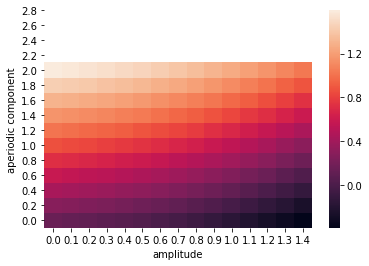

In [9]:
logged_data =np.log10(data)
ax = sb.heatmap(logged_data, xticklabels=AMPS, yticklabels=APCS)

ax.invert_yaxis()
plt.xlabel("amplitude")
plt.ylabel("aperiodic component")

plt.savefig("../figures/APC_AMP_HEAT_DEMO_LOGGED.pdf")